In [1]:
using HypothesisTests, DataFrames, Gadfly, Distributions

# Problem 1-b 

In [2]:
BinomialTest(51, 58)

Binomial test
-------------
Population details:
    parameter of interest:   Probability of success
    value under h_0:         0.5
    point estimate:          0.8793103448275862
    95% confidence interval: (0.7670163622920062,0.9500733839765192)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           2.4021645783634046e-9 (extremely significant)

Details:
    number of observations: 58
    number of successes:    51


# Problem 2 

In [3]:
nit = readtable("Nitrates.CSV")

,Site,Depth,SummerN,WinterN
1,1,90,12.2,19.2
2,2,45,2.8,2.0
3,3,30,14.0,10.2
4,4,33,9.1,7.6
5,5,30,27.4,21.3
6,6,30,6.5,2.2
7,7,28,6.5,6.4
8,8,36,6.5,5.0
9,9,35,12.3,8.9
10,10,20,2.4,3.6


# Part a 

In [4]:
ci(OneSampleTTest(nit[:SummerN]), .1)

(4.144129459658007,10.749203873675325)

# Part b 

<p>
Recall we assume independance, randomness of observation, and normal for large n.

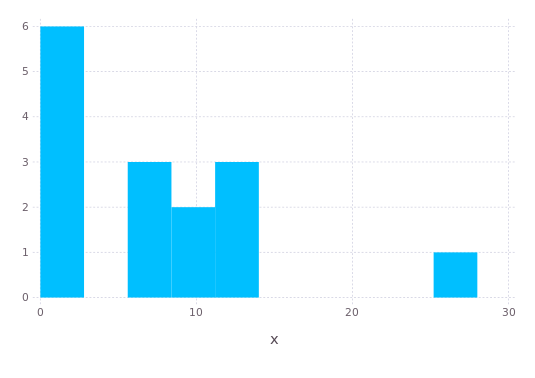

In [5]:
plot(x = nit[:SummerN], Geom.histogram)

In [6]:
function EstimateNormalSampleSize(σ², ϵ; α = .95)
    β = (1 - α) / 2
    z = quantile(Normal(0,1), 1 - β)
    (z^2 * σ²) / ϵ^2
end

EstimateNormalSampleSize (generic function with 1 method)

# Part c 

In [7]:
EstimateNormalSampleSize(var(nit[:SummerN]), 1.5)

90.03859151126022

# Problem 3 

In [8]:
UnequalVarianceTTest(nit[:SummerN], nit[:WinterN])

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.546666666666666
    95% confidence interval: (-4.528899094732162,5.622232428065494)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8268531079638983 (not signficant)

Details:
    number of observations:   [15,15]
    t-statistic:              0.22084142439291987
    degrees of freedom:       27.403441475017857
    empirical standard error: 2.4753810032217487


# Problem 4 

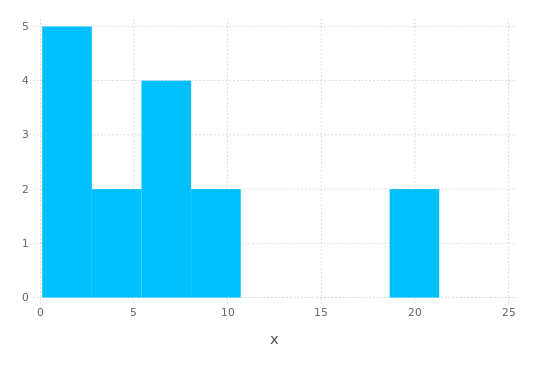

In [9]:
plot(x = nit[:WinterN], Geom.histogram)

In [10]:
OneSampleTTest(nit[:WinterN], 10)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         10
    point estimate:          6.9
    95% confidence interval: (3.433853315646355,10.366146684353646)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.07570971736169231 (not signficant)

Details:
    number of observations:   15
    t-statistic:              -1.91822197328185
    degrees of freedom:       14
    empirical standard error: 1.6160799131584693


In [11]:
function UnequalVarianceTTest2(nx, ny, mu1, mu2, s1, s2, μ0::Real=0)
    xbar = mu1 - mu2
    varx, vary = s1^2, s2^2
    stderr = sqrt(varx/nx + vary/ny)
    t = (xbar-μ0)/stderr
    df = (varx / nx + vary / ny)^2 / ((varx / nx)^2 / (nx - 1) + (vary / ny)^2 / (ny - 1))
    UnequalVarianceTTest(nx, ny, xbar, df, stderr, t, μ0)
end

UnequalVarianceTTest2 (generic function with 2 methods)

In [12]:
function UnequalVarianceTTest{T<:Real,S<:Real}(x::AbstractVector{T}, y::AbstractVector{S}, μ0::Real=0)
    nx, ny = length(x), length(y)
    xbar = mean(x)-mean(y)
    varx, vary = var(x), var(y)
    stderr = sqrt(varx/nx + vary/ny)
    t = (xbar-μ0)/stderr
    df = (varx / nx + vary / ny)^2 / ((varx / nx)^2 / (nx - 1) + (vary / ny)^2 / (ny - 1))
    UnequalVarianceTTest(nx, ny, xbar, df, stderr, t, μ0)
end

LoadError: error in method definition: function HypothesisTests.UnequalVarianceTTest must be explicitly imported to be extended
while loading In[12], in expression starting on line 1

In [13]:
ci(UnequalVarianceTTest2(23, 28, 89, 80, 12, 16), .1)

(2.4190161231445053,15.580983876855495)

In [14]:
stud1 = Normal(89, 12);
stud2 = Normal(80, 16);
st1 = rand(stud1, 23);
st2 = rand(stud2, 28);
ci(UnequalVarianceTTest(st1, st2), .1)

(-0.10801415938746395,14.820680130575623)

# Problem 7 

In [15]:
pat = [10, 2, 6, 3, 9, 4, 5, 5, 8, 7, 19, 12];

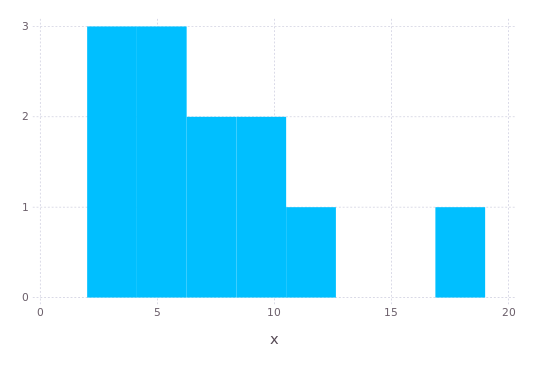

In [16]:
plot(x = pat, Geom.histogram)

In [17]:
describe(pat)

Min      2.0
1st Qu.  4.75
Median   6.5
Mean     7.5
3rd Qu.  9.25
Max      19.0
NAs      0
NA%      0.0%


In [18]:
function samplestrap(data, n; coverage = .95)
    q = length(data)
    res = zeros(Float64, n)
    for j = 1:n
        res[j] = quantile(sample(data, q, replace = true), .75)
    end
    α = (1 - coverage) / 2
    sort!(res)
    (res, [res[floor(α * n)], res[ceil((1 - α) * n)]], minimum(res), maximum(res), mean(res, .75))
end

samplestrap (generic function with 1 method)

In [19]:
(samples, interval, min, max, mean) = samplestrap(pat, 1000)

([4.25,5.0,5.0,5.0,5.0,5.25,5.25,5.25,5.25,5.25  …  19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0],[6.0,13.75],4.25,19.0,[4.25,5.0,5.0,5.0,5.0,5.25,5.25,5.25,5.25,5.25  …  19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0])

In [20]:
interval

2-element Array{Float64,1}:
  6.0 
 13.75

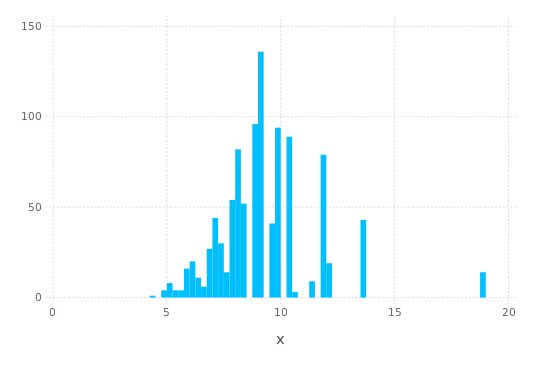

In [21]:
plot(x = samples, Geom.histogram)

In [22]:
samples[977:end]

24-element Array{Float64,1}:
 13.75
 13.75
 13.75
 13.75
 13.75
 13.75
 13.75
 13.75
 13.75
 13.75
 19.0 
 19.0 
 19.0 
 19.0 
 19.0 
 19.0 
 19.0 
 19.0 
 19.0 
 19.0 
 19.0 
 19.0 
 19.0 
 19.0 

In [23]:
?quartile

LoadError: quartile not defined
while loading In[23], in expression starting on line 1